# Nick Wan Data Science Bootcamp Day #7

Notes and code from the seventh day of the Nick Wan data science bootcamp.

*This is the last day of the data science bootcamp wahhhhhhhhhhh*

## Import Data and Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./data/2023-nwbc-data.csv')
era_df = pd.read_csv('./data/era.csv')

print(df.shape)
print(era_df.shape)

(672545, 101)
(632, 14)


## Splitting Your Data - Method #1

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(era_df, random_state=1)

The above code creates a train dataset and a test dataset, but ensures that there is no overlap between the datasets. This is important because there shouldn't be overlap, otherwise our model already knows some of the data it is trying to predict on. Also, this `train_test_split` function is split 75-25, so 75% of the data is in the train dataset and 25% of the data is in the test dataset. Let's set up our machine learning model now:

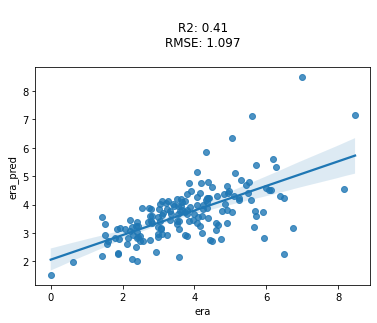

In [4]:
# create our features and targets
target = 'era'
features = ['fip', 'k9']

# initialize, train, and predict with our model
model = LinearRegression()
model.fit(train.loc[:, features], train[target])
test[f'{target}_pred'] = model.predict(test.loc[:, features])


# apply statistics
r2 = pearsonr(test[target], test[f'{target}_pred'])[0]**2
rmse = mean_squared_error(test[target], test[f'{target}_pred'])**0.5

# create a visualization
sns.regplot(data=test, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

Notice how this model has a higher $R^2$ and $RMSE$ - this means that there is less loss and therefore the results of the model improves siginificantly.

## Method #2 - Random Sampling and PREDICTING on Your Entire Dataset

Yes this is possible. Yes this is complicated. Lots of info will get thrown quickly. Read this over and over again.

In [5]:
from sklearn.model_selection import KFold, train_test_split

This `KFold` class is incredibly useful - this lets you perform a splitting on your train and test data as many times as you want! Here - we can prove this:

In [7]:
kf = KFold(5, shuffle=True, random_state=1)

for train_idx, test_idx in kf.split(era_df):
    print(train_idx)
    print(test_idx)

[  1   2   3   4   5   6   7   8   9  10  12  14  15  16  18  19  20  21
  22  24  25  26  27  28  30  31  32  33  35  36  37  38  39  40  42  43
  44  45  46  48  50  51  52  53  54  55  56  57  58  61  63  64  67  68
  70  71  72  73  74  75  76  77  78  79  80  81  83  84  86  87  89  91
  93  94  95  96  97  98  99 100 102 103 104 105 106 108 109 110 112 113
 114 115 116 117 118 121 122 123 124 125 126 127 128 129 130 131 133 134
 136 137 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154
 155 156 157 158 161 162 163 164 166 167 168 169 170 171 173 174 175 176
 177 178 180 182 183 184 186 188 189 190 191 192 193 194 195 196 197 198
 199 202 203 204 205 206 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 243 244 245 246 248 249 251 252 253 254 256 258 259 261 263 264
 265 266 269 270 271 272 275 276 278 279 280 281 282 284 286 287 288 290
 291 292 293 294 295 296 297 298 299 300 302 303 30

Now let's trying implementing `KFold` with our machine learning model:

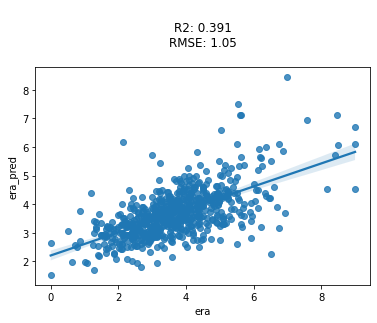

In [12]:
# initialize target and features
target = 'era'
features = ['fip', 'k9']

# initialize k-fold
kf = KFold(5, shuffle=True, random_state=1)

# create empty out-of-sample pd.Series
oos_preds = pd.Series(dtype=float)

for train_idx, test_idx in kf.split(era_df):
    train = era_df.loc[train_idx]
    test = era_df.loc[test_idx]

    # initialize the model, train the model, predict using the model
    model = LinearRegression()
    model.fit(train.loc[:, features], train[target])
    test[f'{target}_pred'] = model.predict(test.loc[:, features])

    # concatenate new preds to oos Series
    oos_preds = pd.concat([oos_preds, test[f'{target}_pred']])

# join oos_preds onto main dataframe
era_df[f'{target}_pred'] = oos_preds

# apply statistics
r2 = pearsonr(era_df[target], era_df[f'{target}_pred'])[0]**2
rmse = mean_squared_error(era_df[target], era_df[f'{target}_pred'])**0.5

# create a visualization
sns.regplot(data=era_df, x=target, y=f'{target}_pred')
title_str = f"""
R2: {round(r2, 3)}
RMSE: {round(rmse, 3)}
"""
plt.title(title_str)
plt.show()

The above is now a complete machine learning pipeline - now THAT is pretty crazy. Additonally, we can make two claims:
 1. we are not overfitting the data
 2. we are using the entire dataset

# AND THAT IS THE BOOTCAMP OMG HAPPY DAY CRAZYYYYYYYYYYYYYYYY